In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv(r"data\Obesity Classification.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [21]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()

data['Label'] = le.fit_transform(data['Label'])
data = pd.get_dummies(data,drop_first=True,columns=['Gender'])


<Axes: >

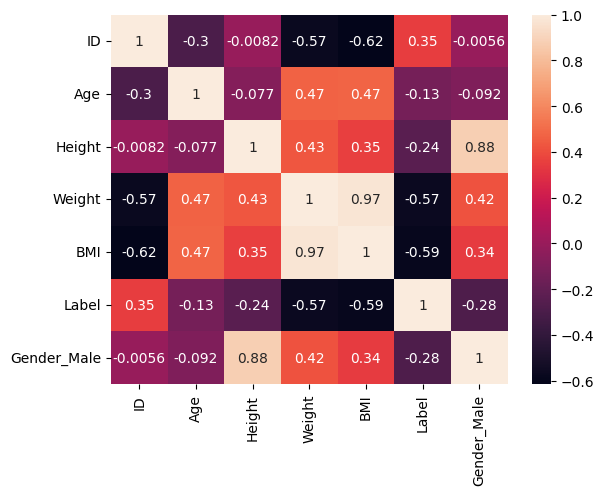

In [23]:
sns.heatmap(data.corr(),annot=True)

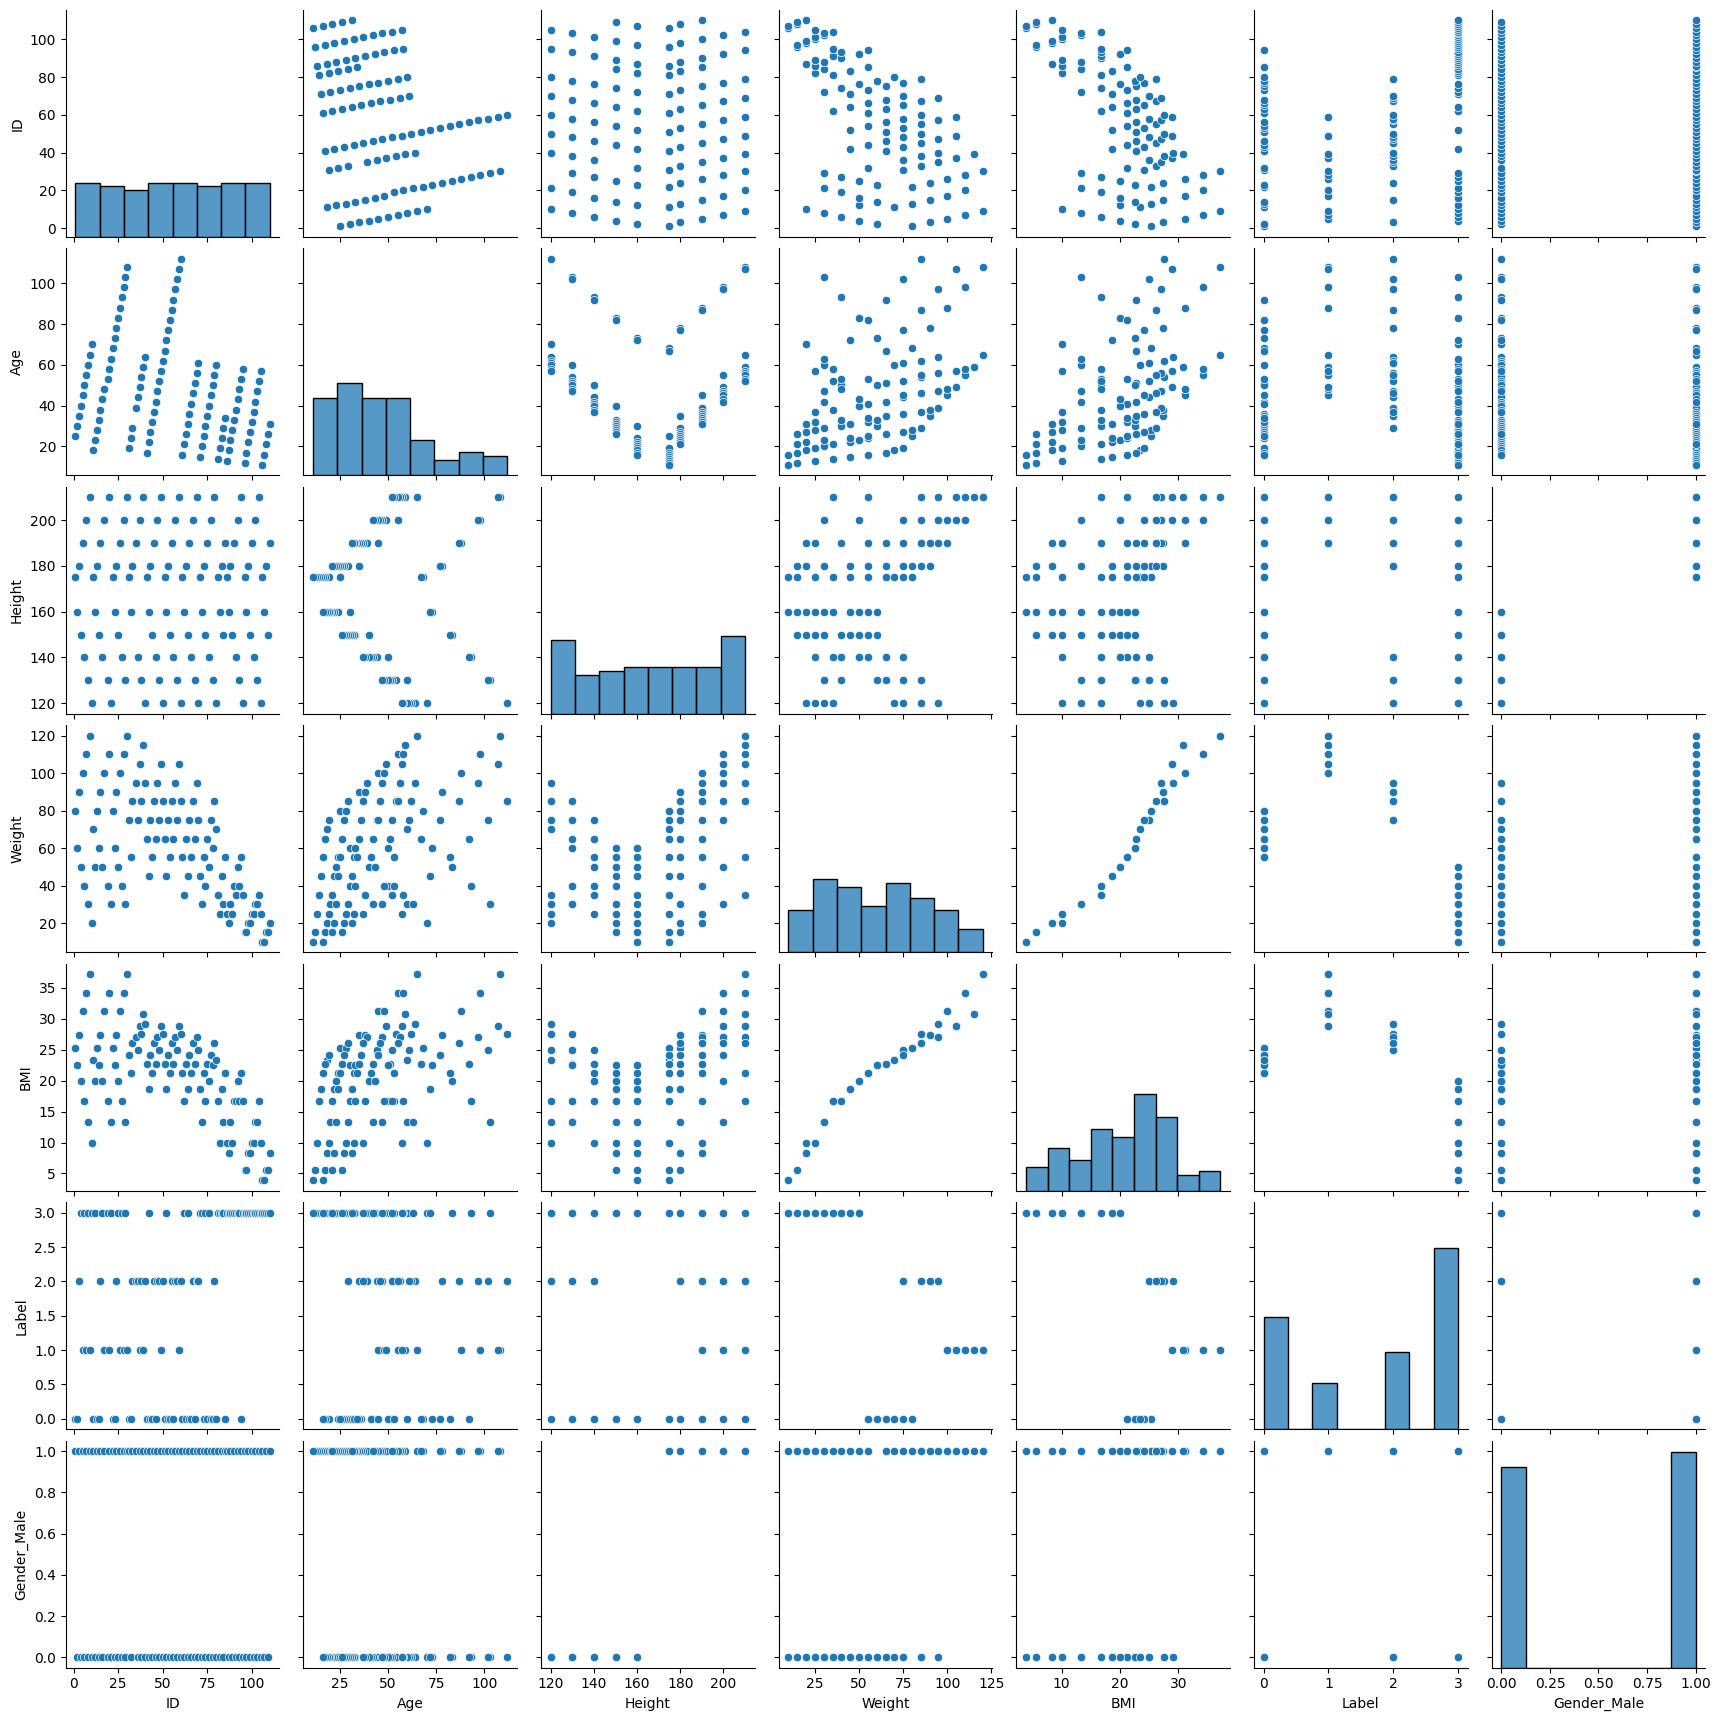

In [24]:
sns.pairplot(data)

In [25]:
x = data.drop(columns='Label')
y = data['Label']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy'
)

model.fit(x_train,y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Confusion Matrix: [[6 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]
Accuracy Score: 1.0
